In [1]:
import numpy as np
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Lambda

from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19

from keras.optimizers import Adam
from keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import np_utils
import os
import numpy as np
from tqdm import tqdm 

Using TensorFlow backend.


In [3]:
import os
import keras
from keras.preprocessing.image import load_img, img_to_array
os.environ["CUDA_VISIBLE_DEVICES"] = "1"


import efficientnet.keras as efn 
from keras.models import Model, load_model
model_a = load_model('efficientnet_0.0008.h5')

def load_image(img_url):
    image = load_img(img_url,target_size=(256,256))
    image = img_to_array(image)
    image /= 255
    image = np.expand_dims(image,axis=0)
    return image

In [4]:
import numpy as np
image1 = load_img('/raid/N467992020-09-18_09_31_44_29_32.png',target_size=(256,256))
image1 = img_to_array(image1)
image1 /= 255

IMAGE1 = np.asarray(image1)

Y_pred1 = model_a.predict(IMAGE1[np.newaxis,...])
np.argmax(Y_pred1)

1

In [6]:
from vis.utils import utils      ###   pip install keras-vis
# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model_a, 'fc2')
# Swap softmax with linear
model_a.layers[layer_idx].activation = keras.activations.linear
model = utils.apply_modifications(model_a)

In [7]:
model_a.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 128, 128, 48) 1296        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 128, 128, 48) 192         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 128, 128, 48) 0           stem_bn[0][0]                    
__________________________________________________________________________________________________
block1a_dw

In [8]:
from vis.utils import utils
from vis.visualization import visualize_cam
penultimate_layer_idx = utils.find_layer_idx(model, "top_conv") 
class_idx  = 1
seed_input = IMAGE1
grad_top1  = visualize_cam(model, layer_idx, class_idx, seed_input, 
                           penultimate_layer_idx = penultimate_layer_idx,#None,
                           backprop_modifier     = None,
                           grad_modifier         = None)

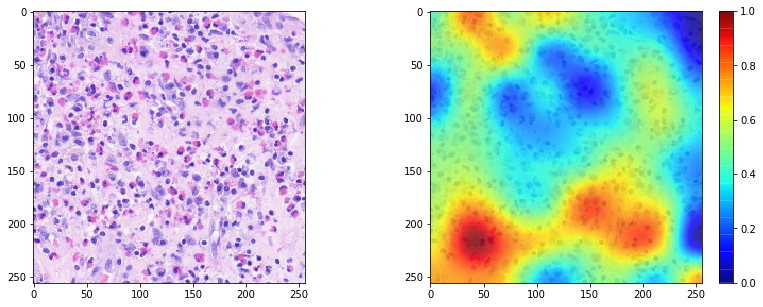

In [10]:
import matplotlib.pyplot as plt
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(image1)
    axes[1].imshow(image1)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    plt.rcParams['savefig.dpi'] =300
    plt.rcParams['figure.dpi'] = 300
plot_map(grad_top1)

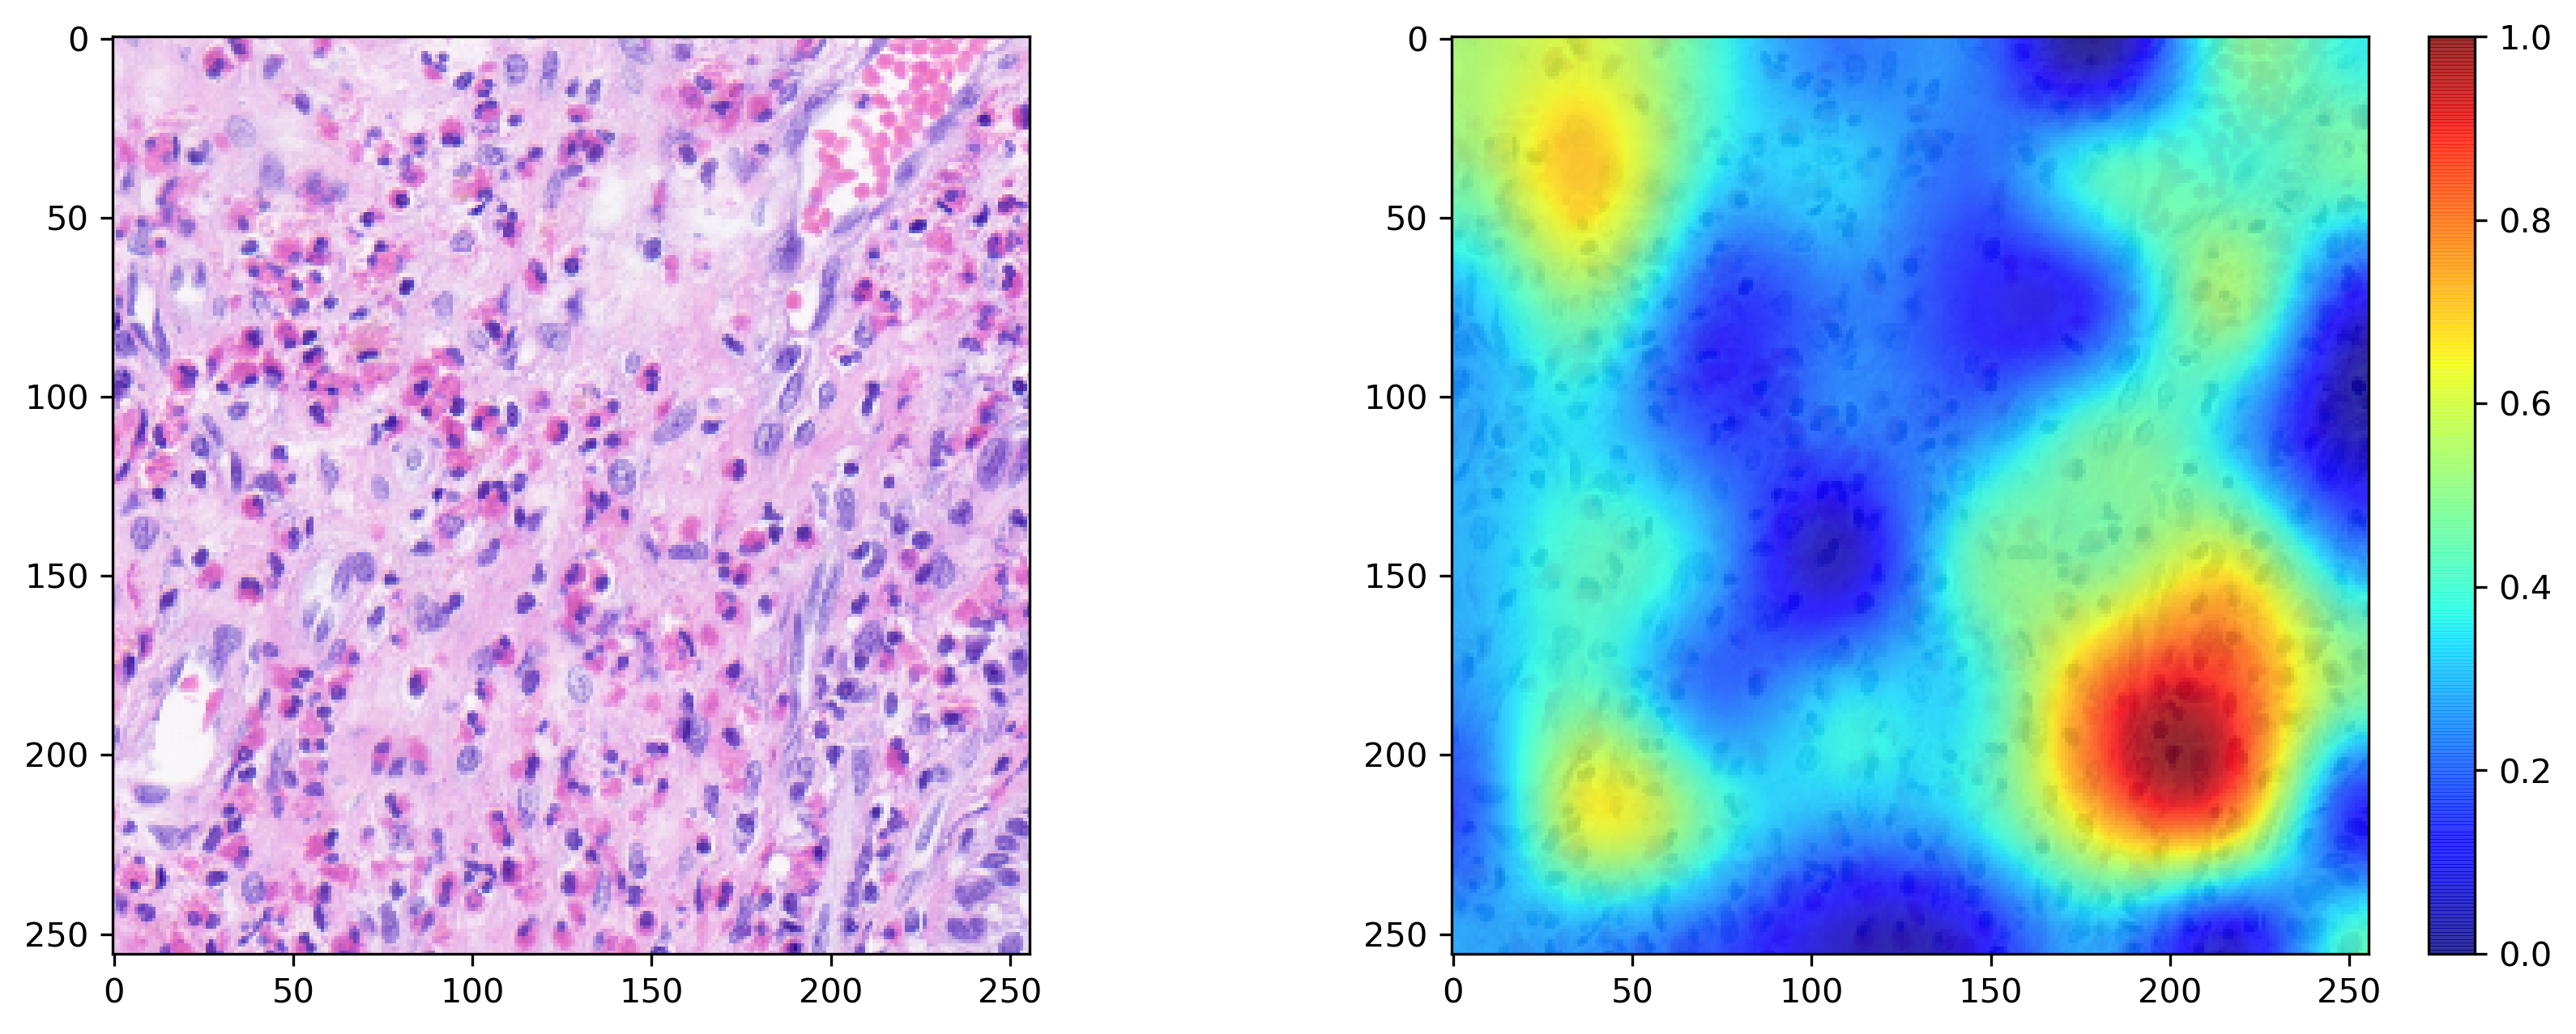

In [11]:
import numpy as np
image1 = load_img('/raid/N467992020-09-18_09_31_44_8_27.png',target_size=(256,256))
image1 = img_to_array(image1)
image1 /= 255

IMAGE1 = np.asarray(image1)

Y_pred1 = model_a.predict(IMAGE1[np.newaxis,...])
np.argmax(Y_pred1)

from vis.utils import utils
from vis.visualization import visualize_cam
penultimate_layer_idx = utils.find_layer_idx(model, "top_conv") 
class_idx  = 1   ### set as true label of this patch
seed_input = IMAGE1
grad_top1  = visualize_cam(model, layer_idx, class_idx, seed_input, 
                           penultimate_layer_idx = penultimate_layer_idx,#None,
                           backprop_modifier     = None,
                           grad_modifier         = None)

import matplotlib.pyplot as plt
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(image1)
    axes[1].imshow(image1)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    
    plt.rcParams['savefig.dpi'] =300
    plt.rcParams['figure.dpi'] = 300
plot_map(grad_top1)

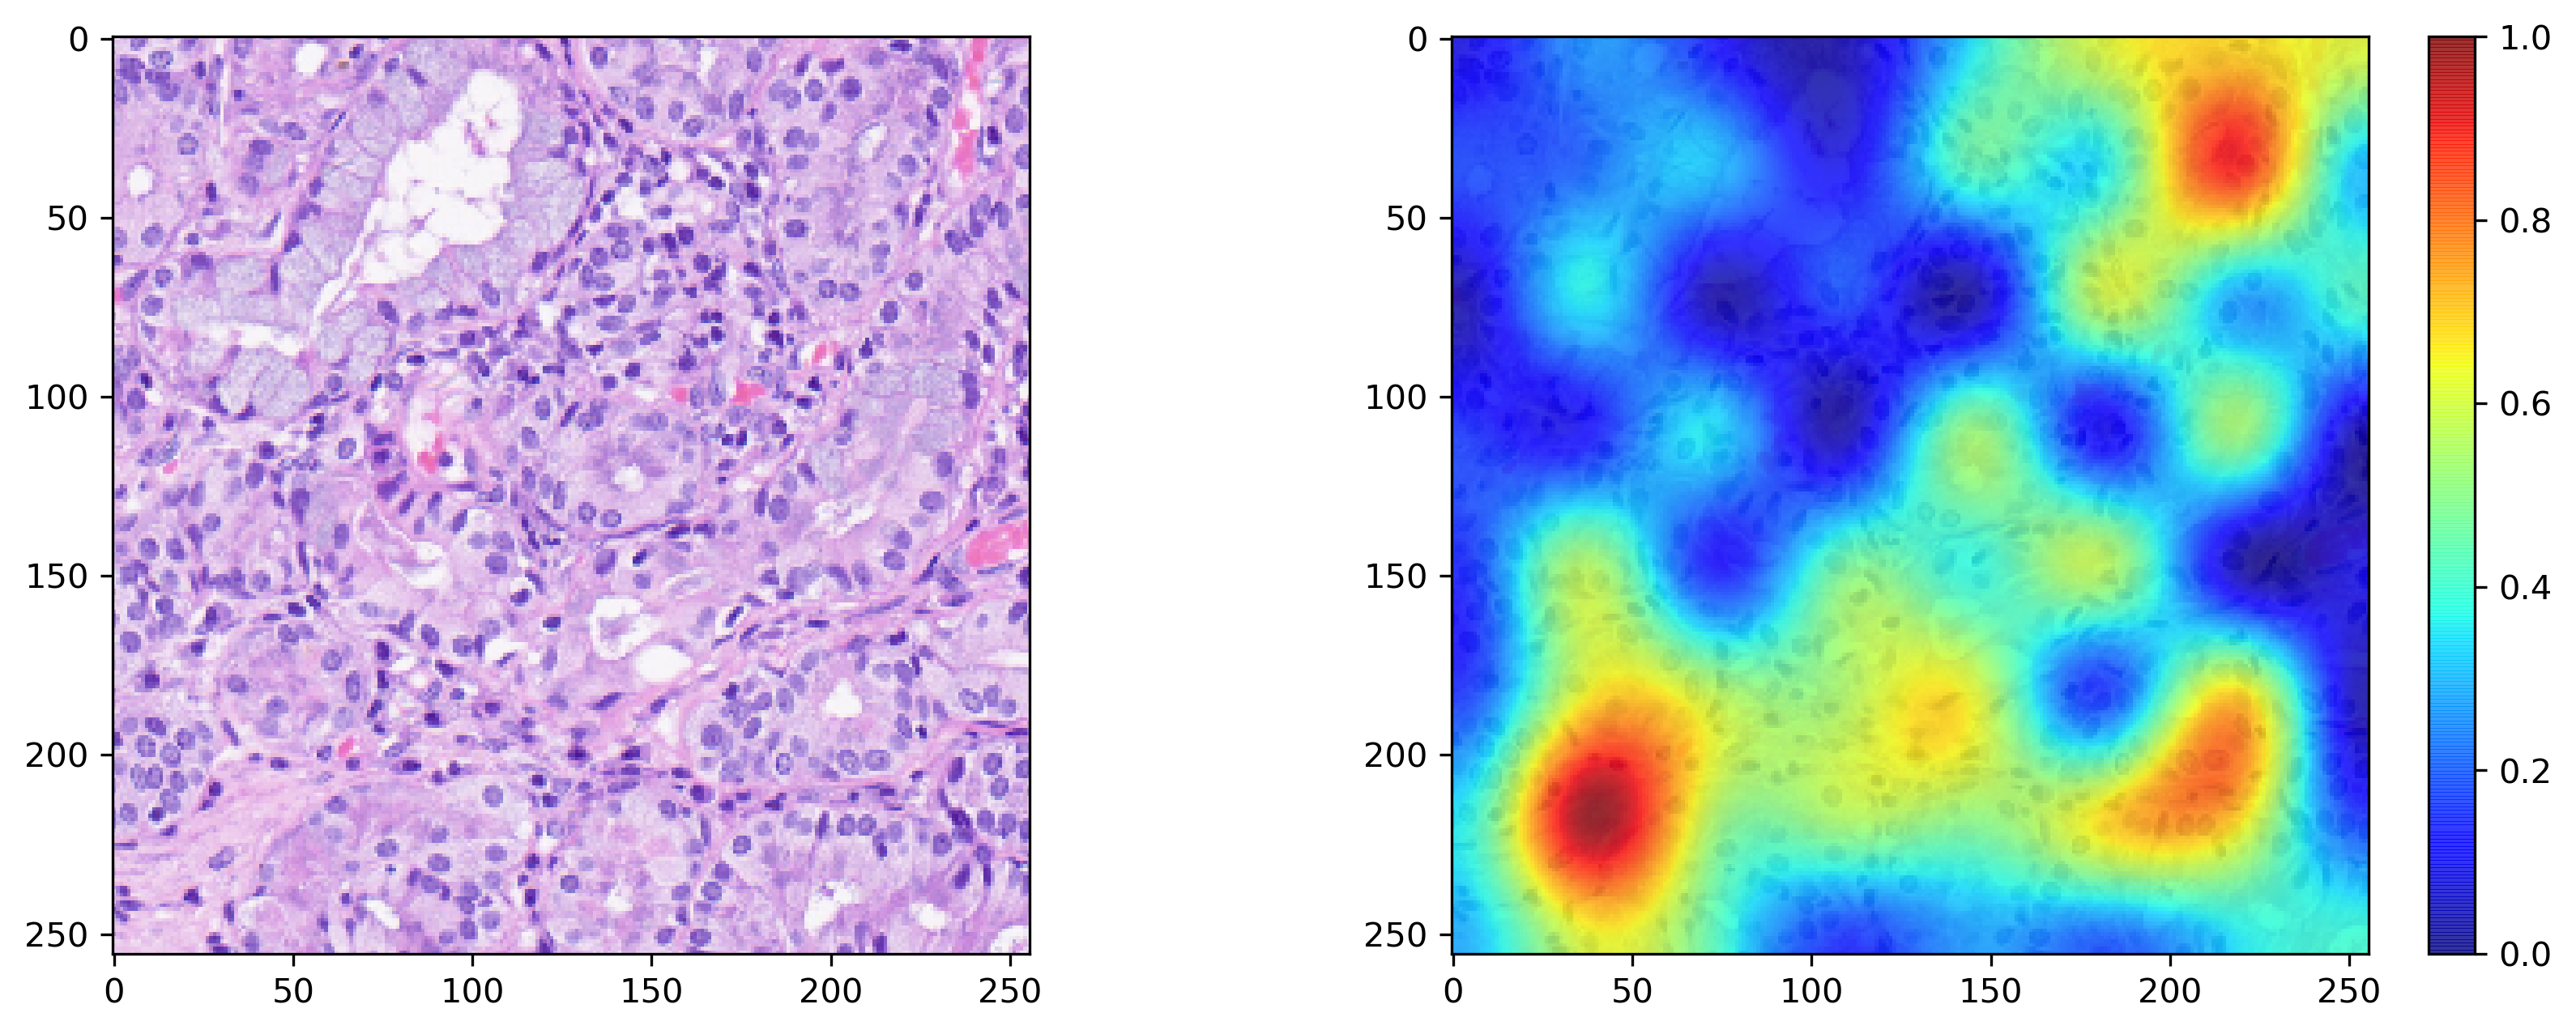

In [12]:
import numpy as np
image1 = load_img('/raid/N471412020-09-18_09_27_41_30_85.png',target_size=(256,256))
image1 = img_to_array(image1)
image1 /= 255

IMAGE1 = np.asarray(image1)

Y_pred1 = model_a.predict(IMAGE1[np.newaxis,...])
np.argmax(Y_pred1)

from vis.utils import utils
from vis.visualization import visualize_cam
penultimate_layer_idx = utils.find_layer_idx(model, "top_conv") 
class_idx  = 1
seed_input = IMAGE1
grad_top1  = visualize_cam(model, layer_idx, class_idx, seed_input, 
                           penultimate_layer_idx = penultimate_layer_idx,#None,
                           backprop_modifier     = None,
                           grad_modifier         = None)

import matplotlib.pyplot as plt
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(image1)
    axes[1].imshow(image1)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    
    plt.rcParams['savefig.dpi'] =300
    plt.rcParams['figure.dpi'] = 300
plot_map(grad_top1)

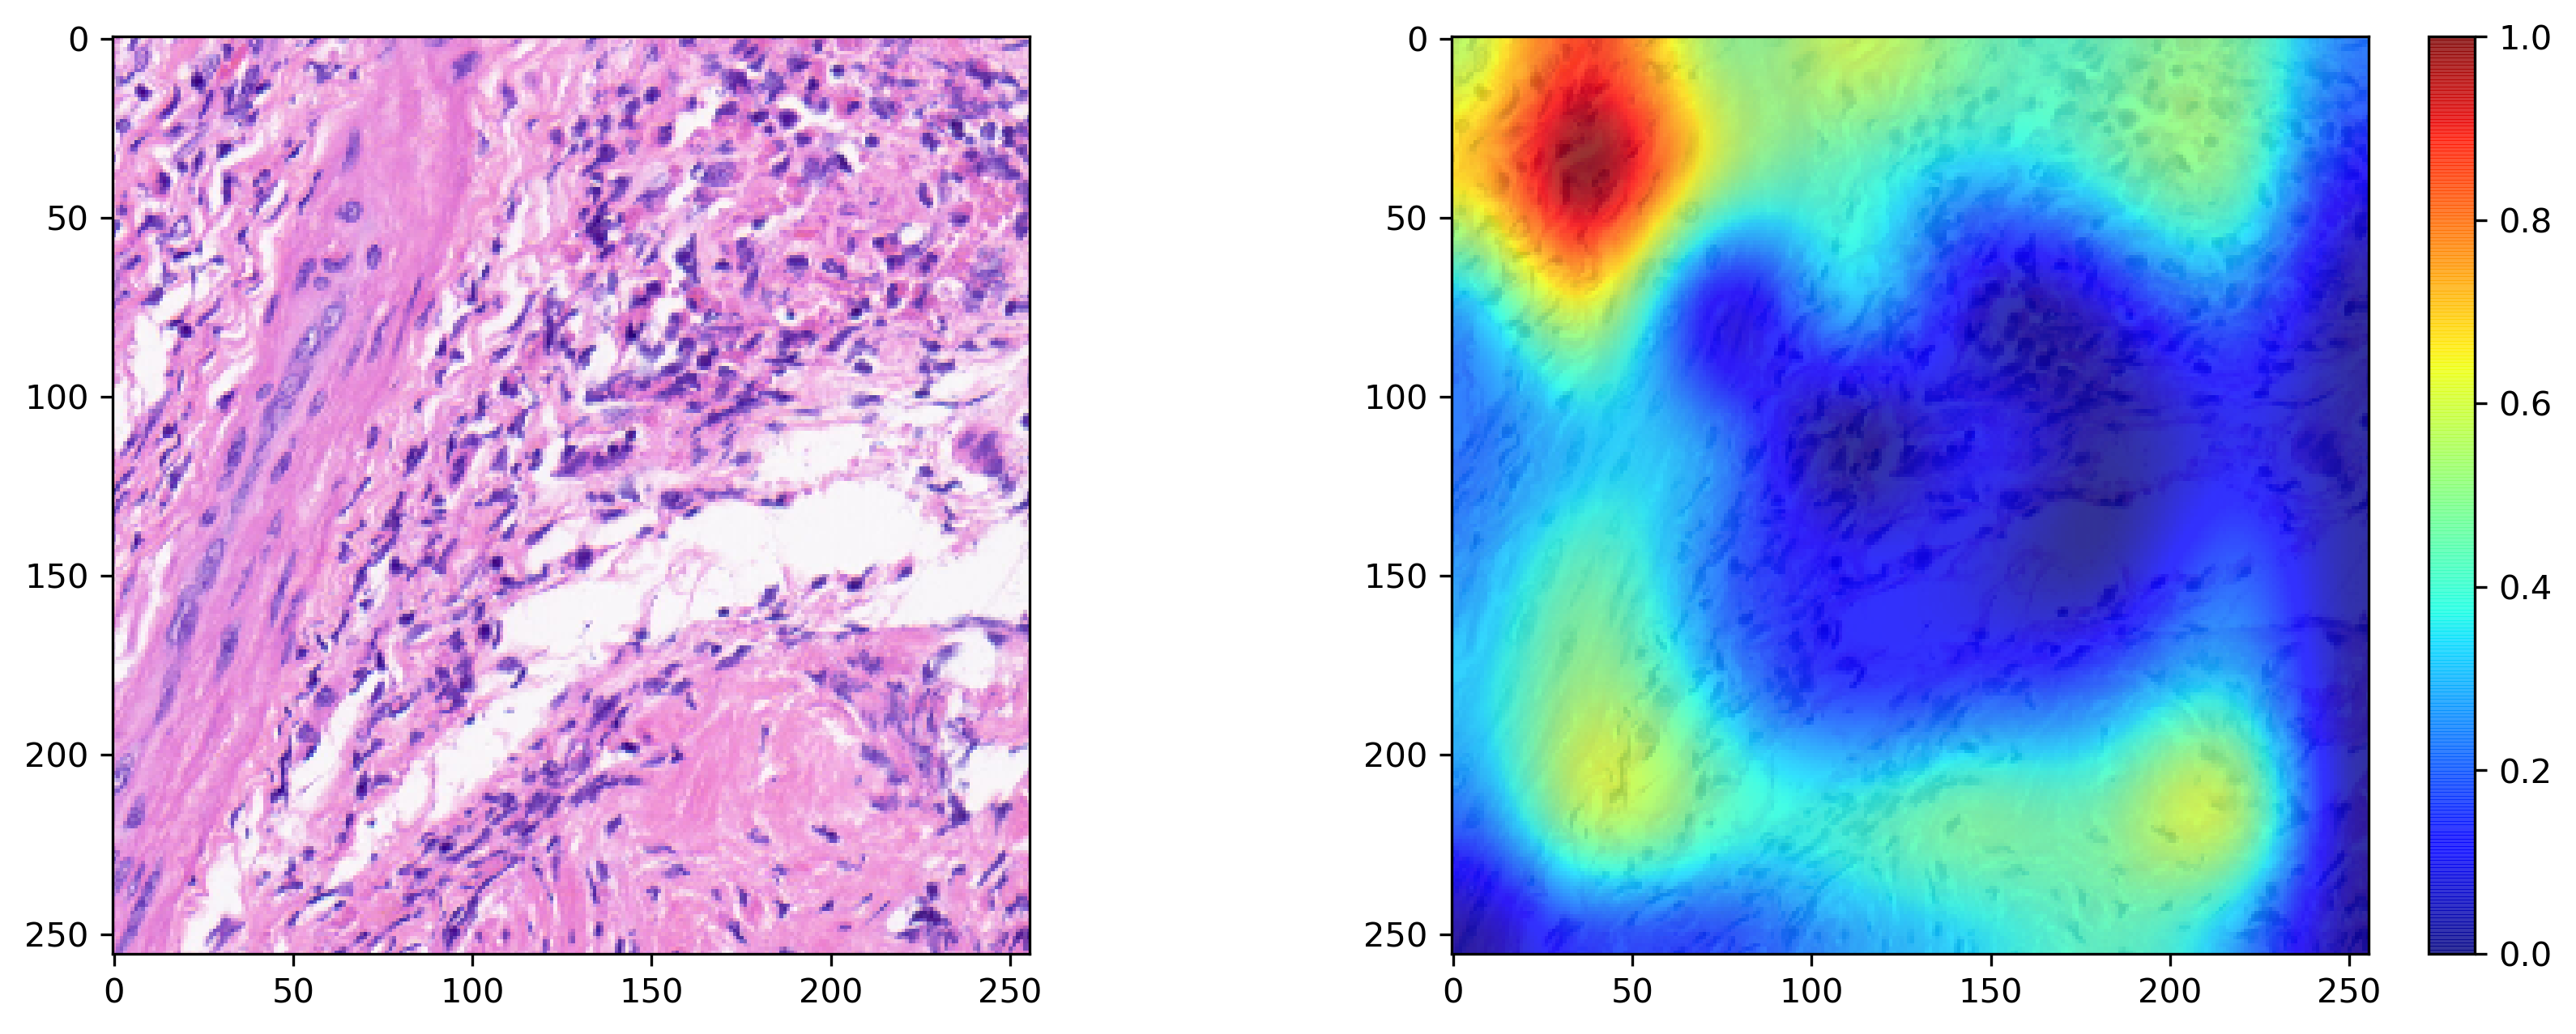

In [13]:
import numpy as np
image1 = load_img('/raid/8012020-09-17_09_19_40_19_22.png',target_size=(256,256))
image1 = img_to_array(image1)
image1 /= 255

IMAGE1 = np.asarray(image1)

Y_pred1 = model_a.predict(IMAGE1[np.newaxis,...])
np.argmax(Y_pred1)

from vis.utils import utils
from vis.visualization import visualize_cam
penultimate_layer_idx = utils.find_layer_idx(model, "top_conv") 
class_idx  = 1
seed_input = IMAGE1
grad_top1  = visualize_cam(model, layer_idx, class_idx, seed_input, 
                           penultimate_layer_idx = penultimate_layer_idx,#None,
                           backprop_modifier     = None,
                           grad_modifier         = None)

import matplotlib.pyplot as plt
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(image1)
    axes[1].imshow(image1)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    
    plt.rcParams['savefig.dpi'] =300
    plt.rcParams['figure.dpi'] = 300
plot_map(grad_top1)

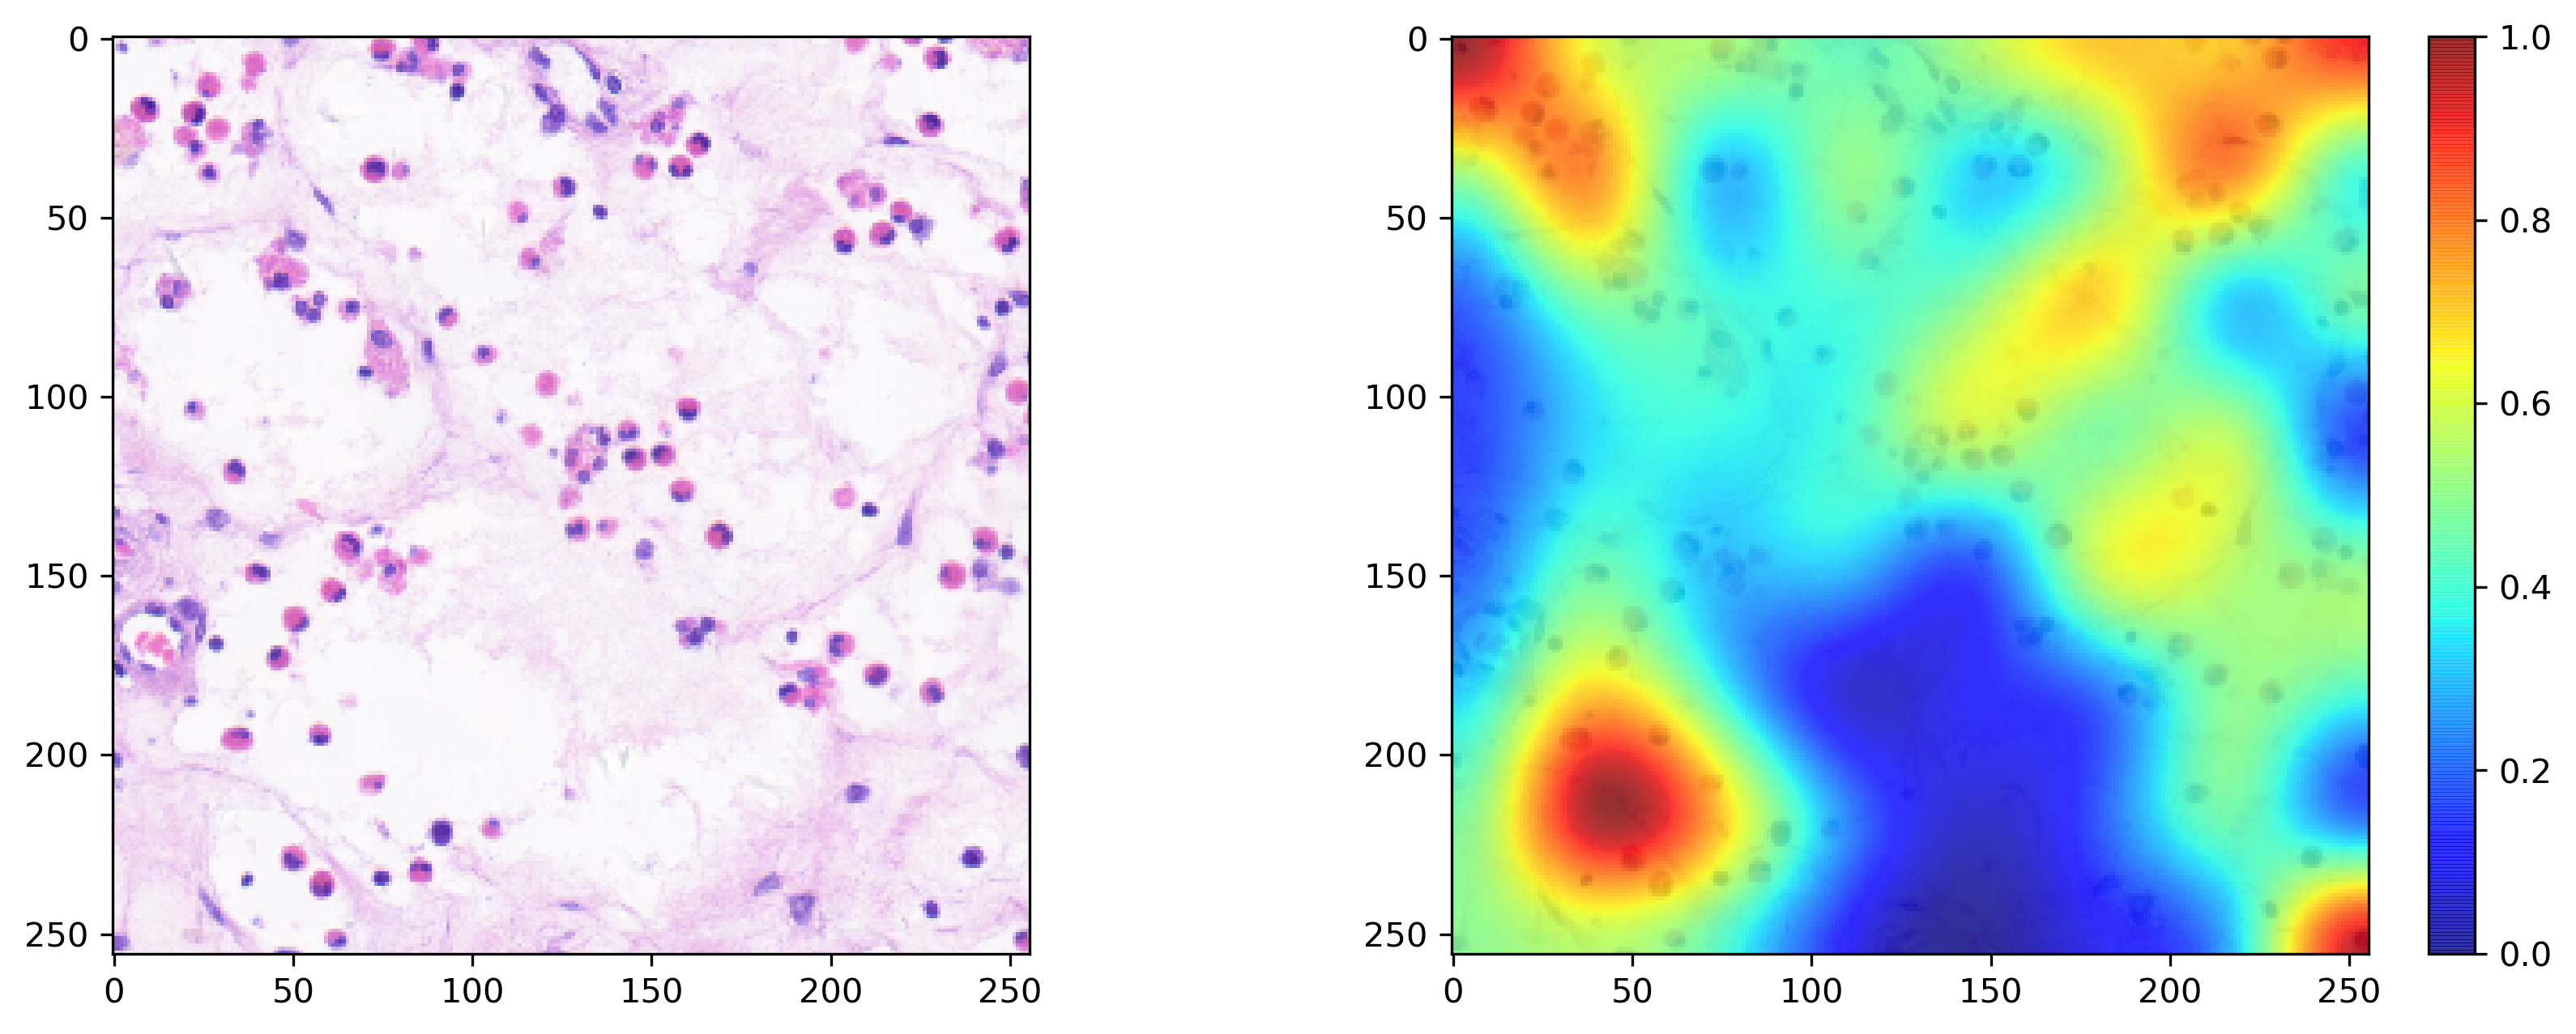

In [22]:
import numpy as np
image1 = load_img('/raid/N467992020-09-18_09_31_44_37_19.png',target_size=(256,256))
image1 = img_to_array(image1)
image1 /= 255

IMAGE1 = np.asarray(image1)

Y_pred1 = model_a.predict(IMAGE1[np.newaxis,...])
np.argmax(Y_pred1)

from vis.utils import utils
from vis.visualization import visualize_cam
penultimate_layer_idx = utils.find_layer_idx(model, "top_conv") 
class_idx  = 1
seed_input = IMAGE1
grad_top1  = visualize_cam(model, layer_idx, class_idx, seed_input, 
                           penultimate_layer_idx = penultimate_layer_idx,#None,
                           backprop_modifier     = None,
                           grad_modifier         = None)

import matplotlib.pyplot as plt
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(image1)
    axes[1].imshow(image1)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    
    plt.rcParams['savefig.dpi'] =300
    plt.rcParams['figure.dpi'] = 300
plot_map(grad_top1)

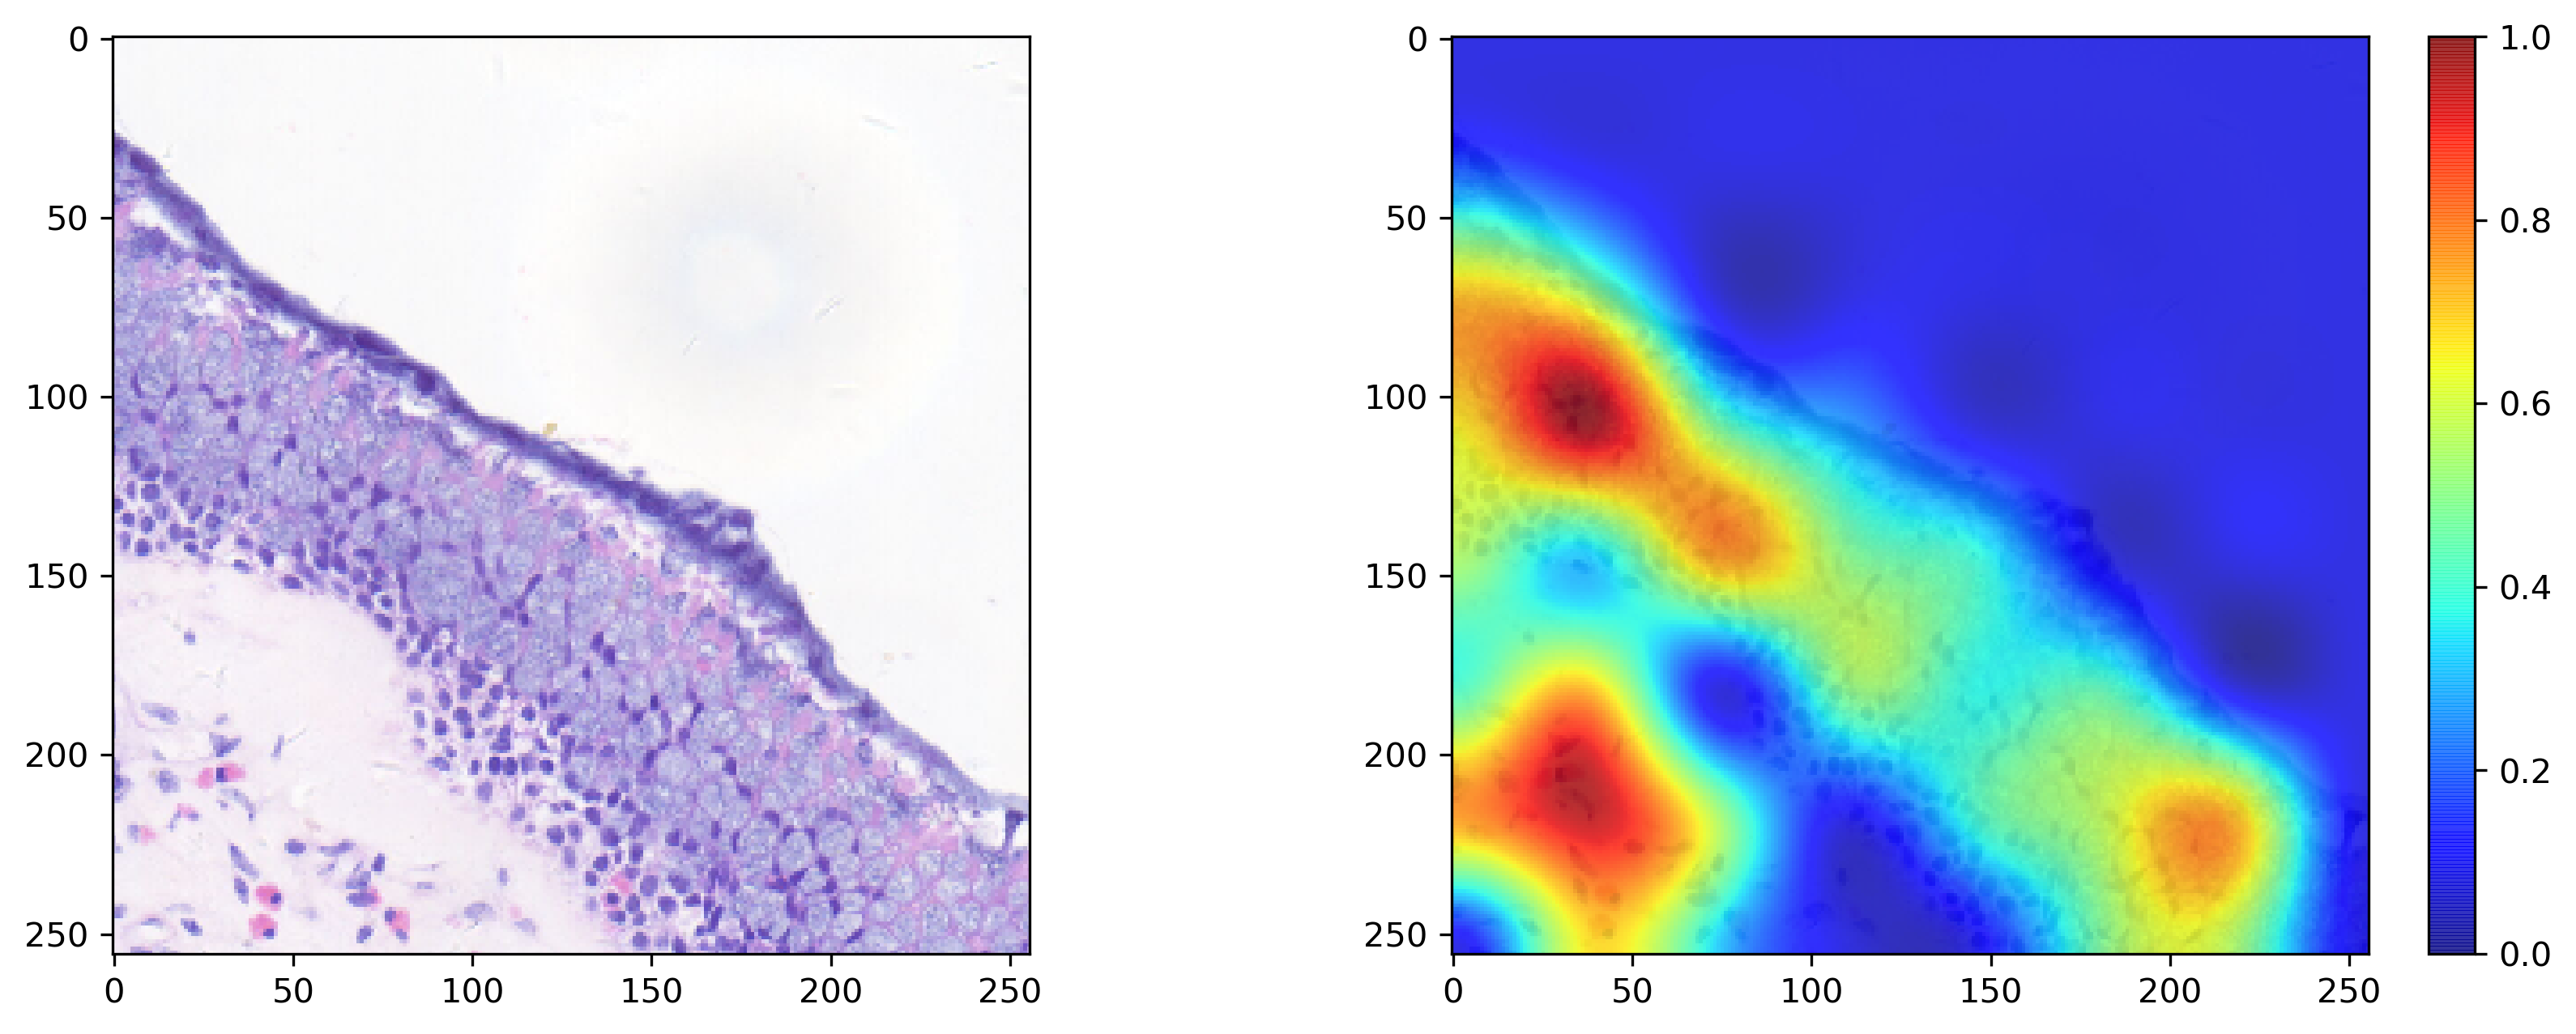

In [25]:
import numpy as np
image1 = load_img('/raid/17122912020-09-17_16_43_19_7_51.png',target_size=(256,256))
image1 = img_to_array(image1)
image1 /= 255

IMAGE1 = np.asarray(image1)

Y_pred1 = model_a.predict(IMAGE1[np.newaxis,...])
np.argmax(Y_pred1)

from vis.utils import utils
from vis.visualization import visualize_cam
penultimate_layer_idx = utils.find_layer_idx(model, "top_conv") 
class_idx  = 1
seed_input = IMAGE1
grad_top1  = visualize_cam(model, layer_idx, class_idx, seed_input, 
                           penultimate_layer_idx = penultimate_layer_idx,#None,
                           backprop_modifier     = None,
                           grad_modifier         = None)

import matplotlib.pyplot as plt
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(image1)
    axes[1].imshow(image1)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    
    plt.rcParams['savefig.dpi'] =300
    plt.rcParams['figure.dpi'] = 300
plot_map(grad_top1)

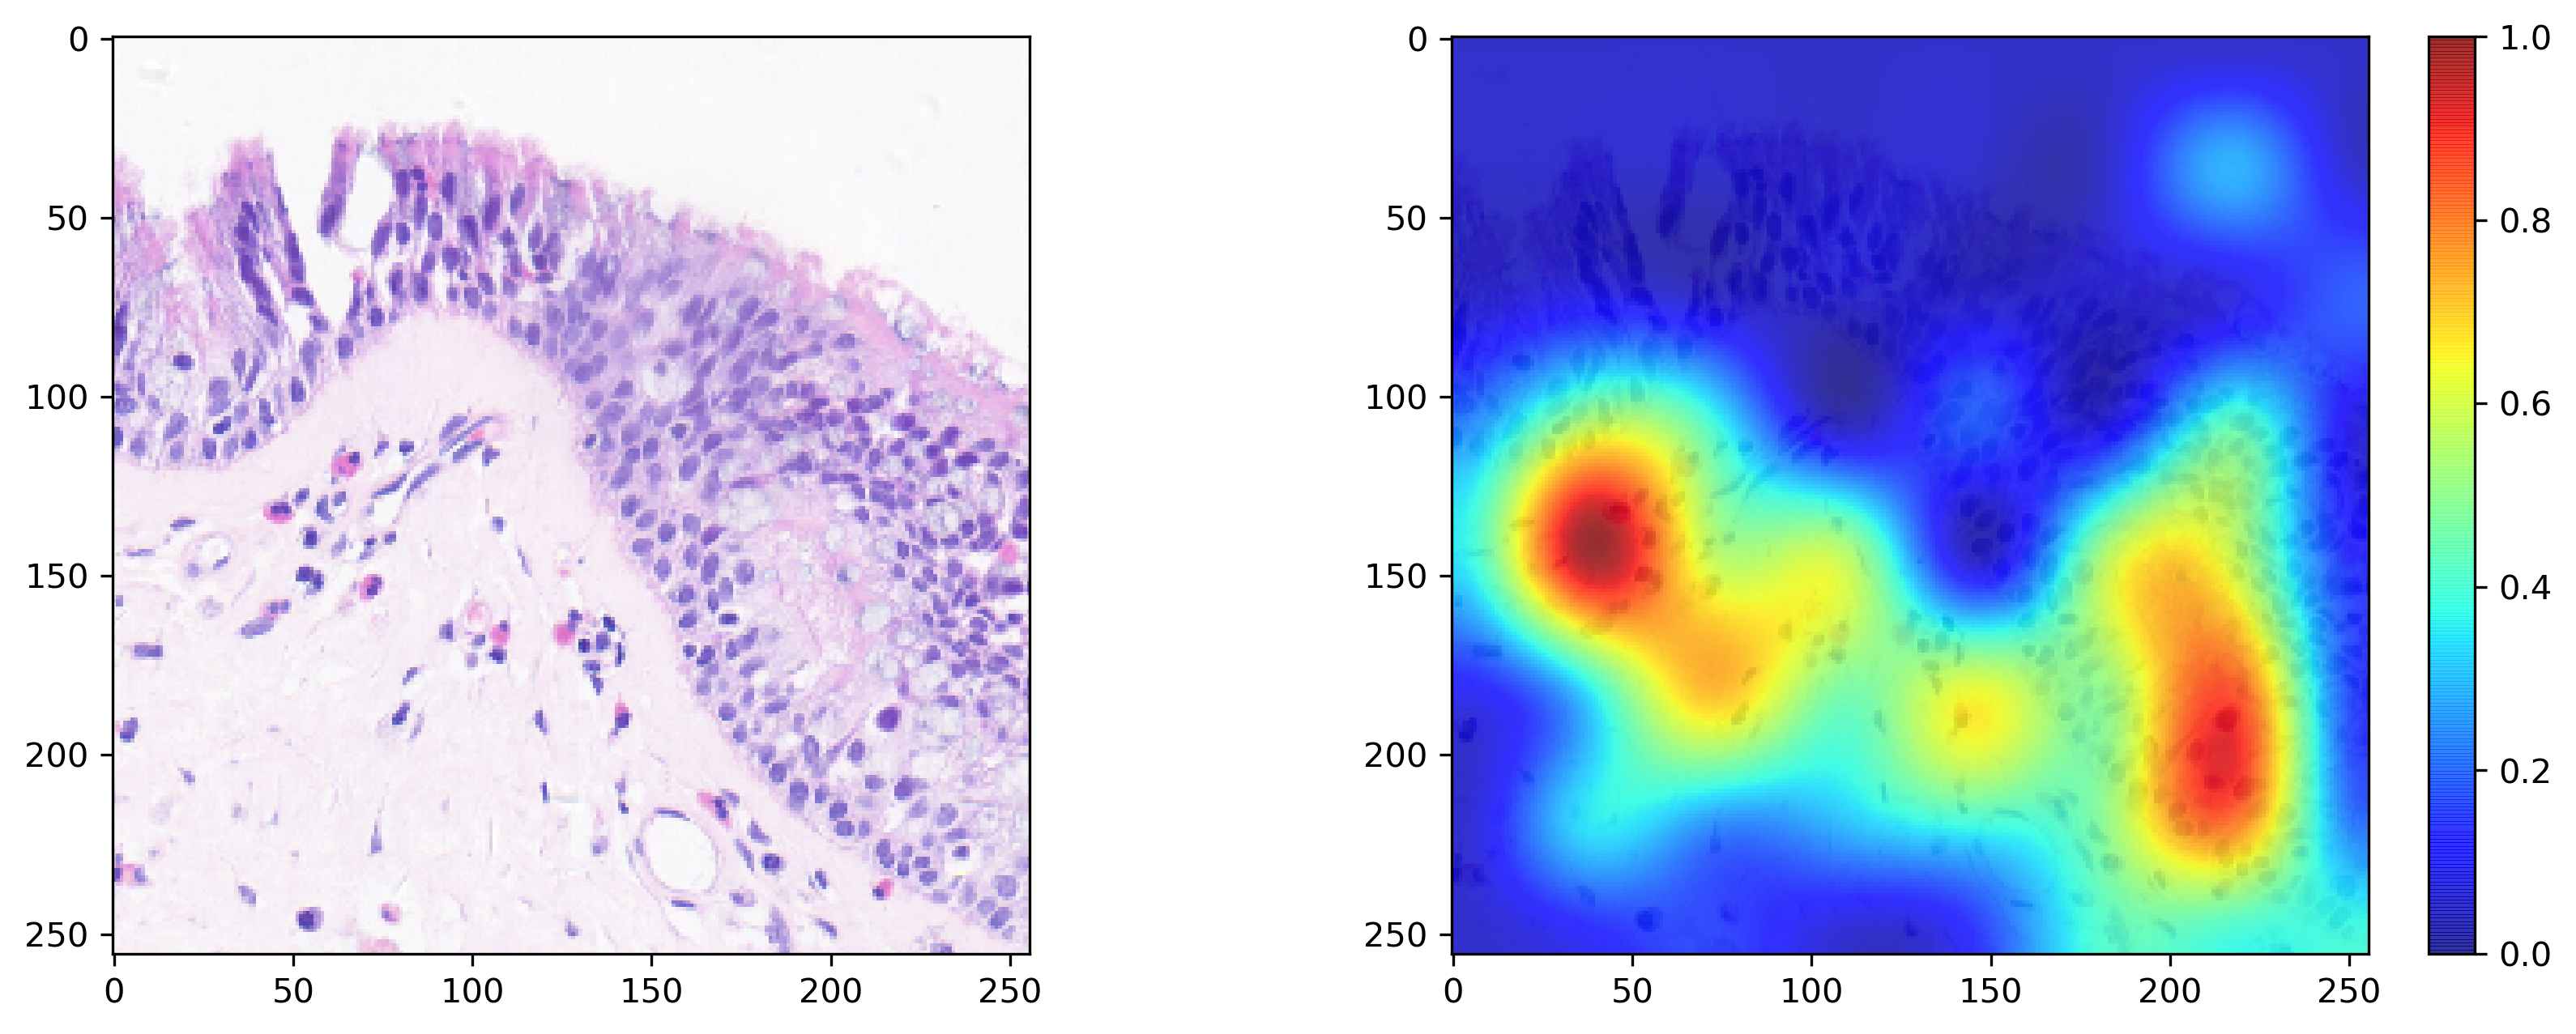

In [28]:
import numpy as np
image1 = load_img('/raid/N508512020-09-18_08_27_23_21_38.png',target_size=(256,256))
image1 = img_to_array(image1)
image1 /= 255

IMAGE1 = np.asarray(image1)

Y_pred1 = model_a.predict(IMAGE1[np.newaxis,...])
np.argmax(Y_pred1)

from vis.utils import utils
from vis.visualization import visualize_cam
penultimate_layer_idx = utils.find_layer_idx(model, "top_conv") 
class_idx  = 1
seed_input = IMAGE1
grad_top1  = visualize_cam(model, layer_idx, class_idx, seed_input, 
                           penultimate_layer_idx = penultimate_layer_idx,#None,
                           backprop_modifier     = None,
                           grad_modifier         = None)

import matplotlib.pyplot as plt
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(image1)
    axes[1].imshow(image1)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    
    plt.rcParams['savefig.dpi'] =300
    plt.rcParams['figure.dpi'] = 300
plot_map(grad_top1)

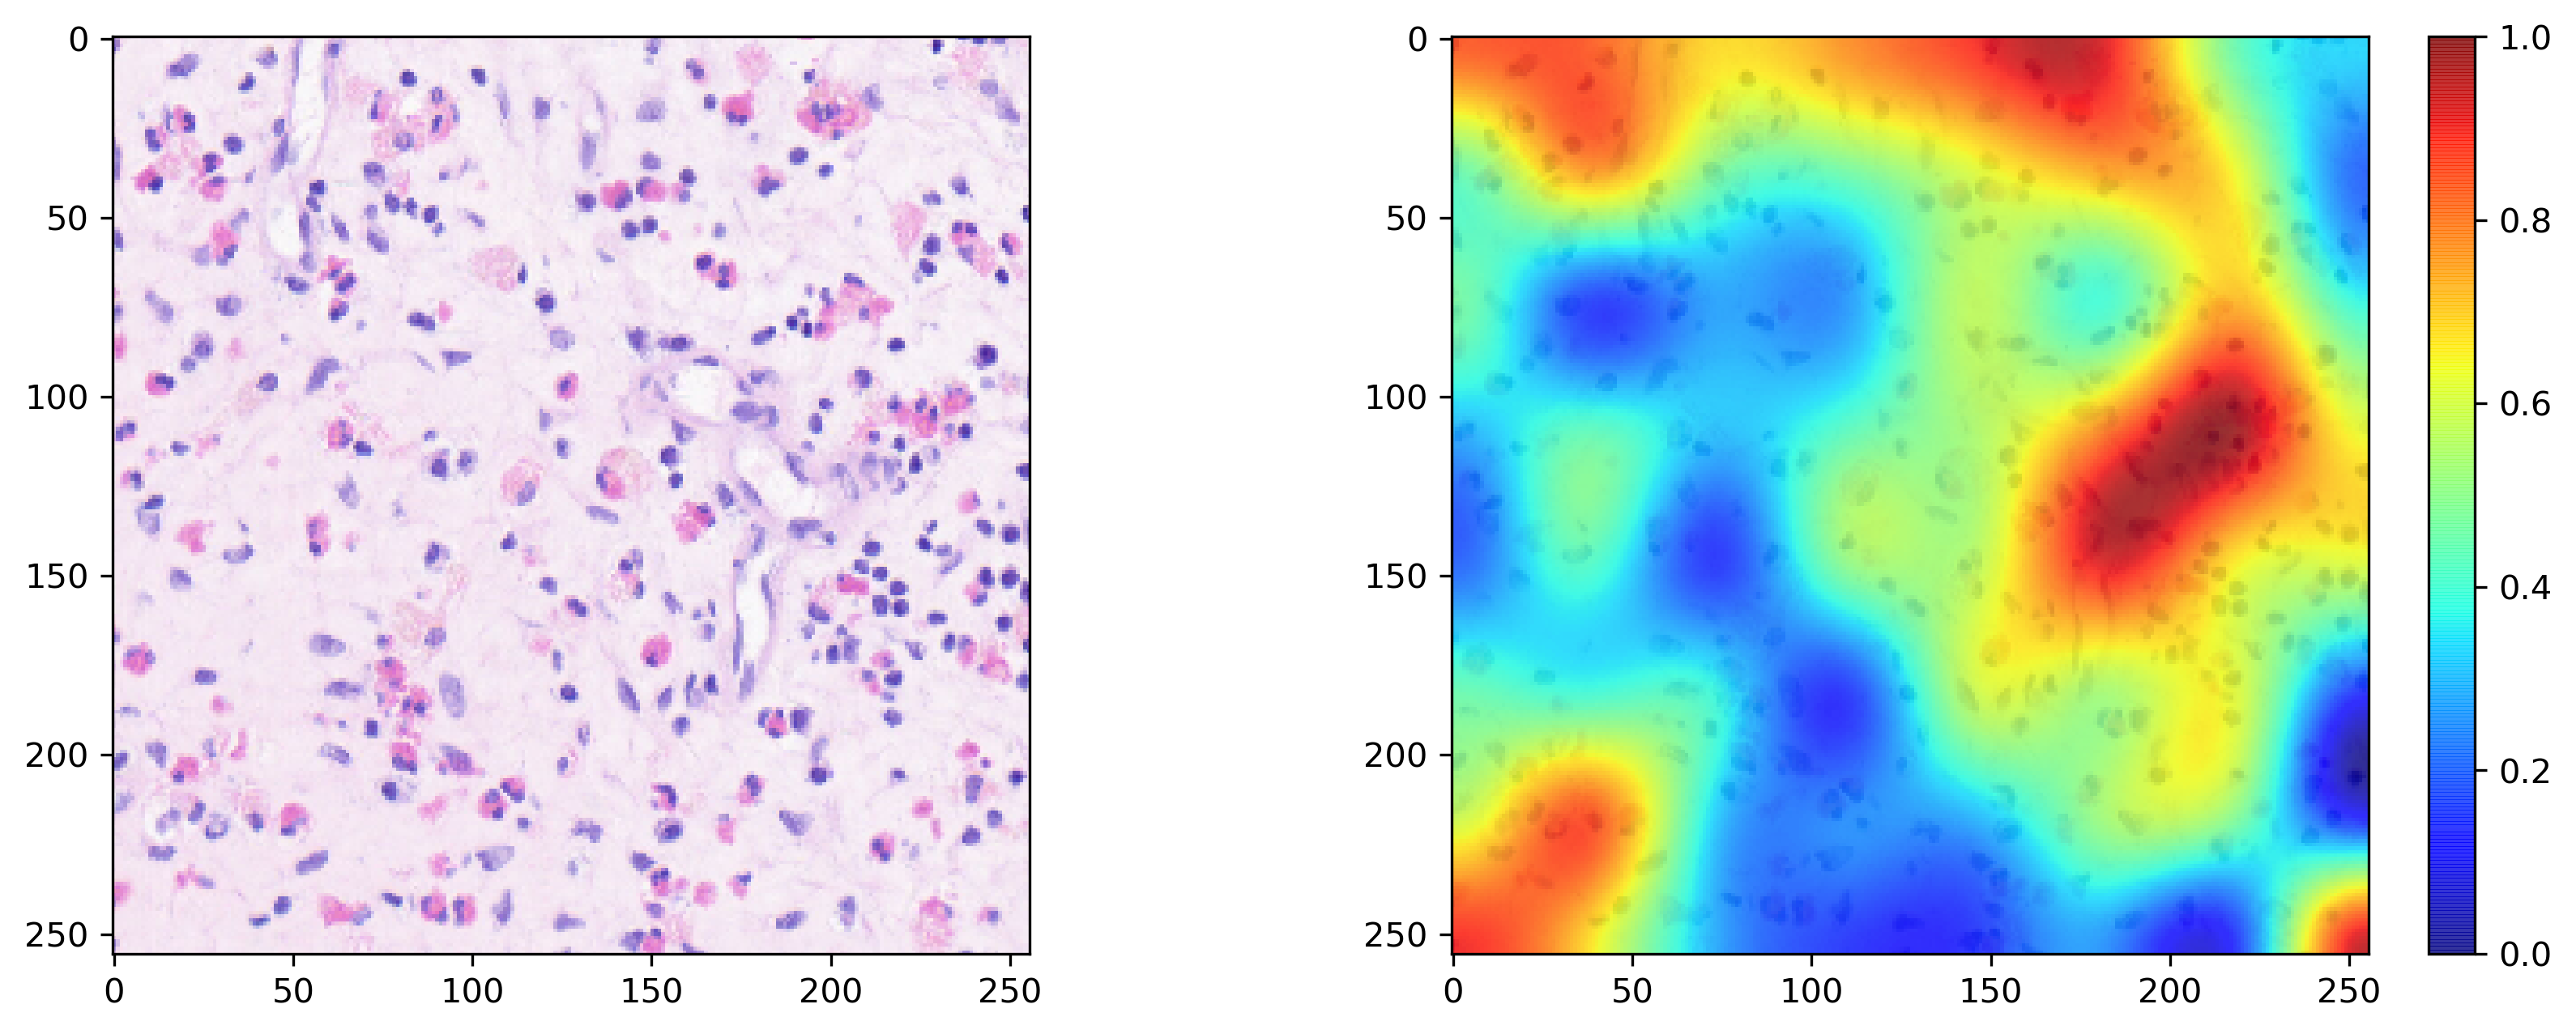

In [29]:
import numpy as np
image1 = load_img('/raid/N508512020-09-18_08_27_23_22_52.png',target_size=(256,256))
image1 = img_to_array(image1)
image1 /= 255

IMAGE1 = np.asarray(image1)

Y_pred1 = model_a.predict(IMAGE1[np.newaxis,...])
np.argmax(Y_pred1)

from vis.utils import utils
from vis.visualization import visualize_cam
penultimate_layer_idx = utils.find_layer_idx(model, "top_conv") 
class_idx  = 1
seed_input = IMAGE1
grad_top1  = visualize_cam(model, layer_idx, class_idx, seed_input, 
                           penultimate_layer_idx = penultimate_layer_idx,#None,
                           backprop_modifier     = None,
                           grad_modifier         = None)

import matplotlib.pyplot as plt
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(image1)
    axes[1].imshow(image1)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    
    plt.rcParams['savefig.dpi'] =300
    plt.rcParams['figure.dpi'] = 300
plot_map(grad_top1)

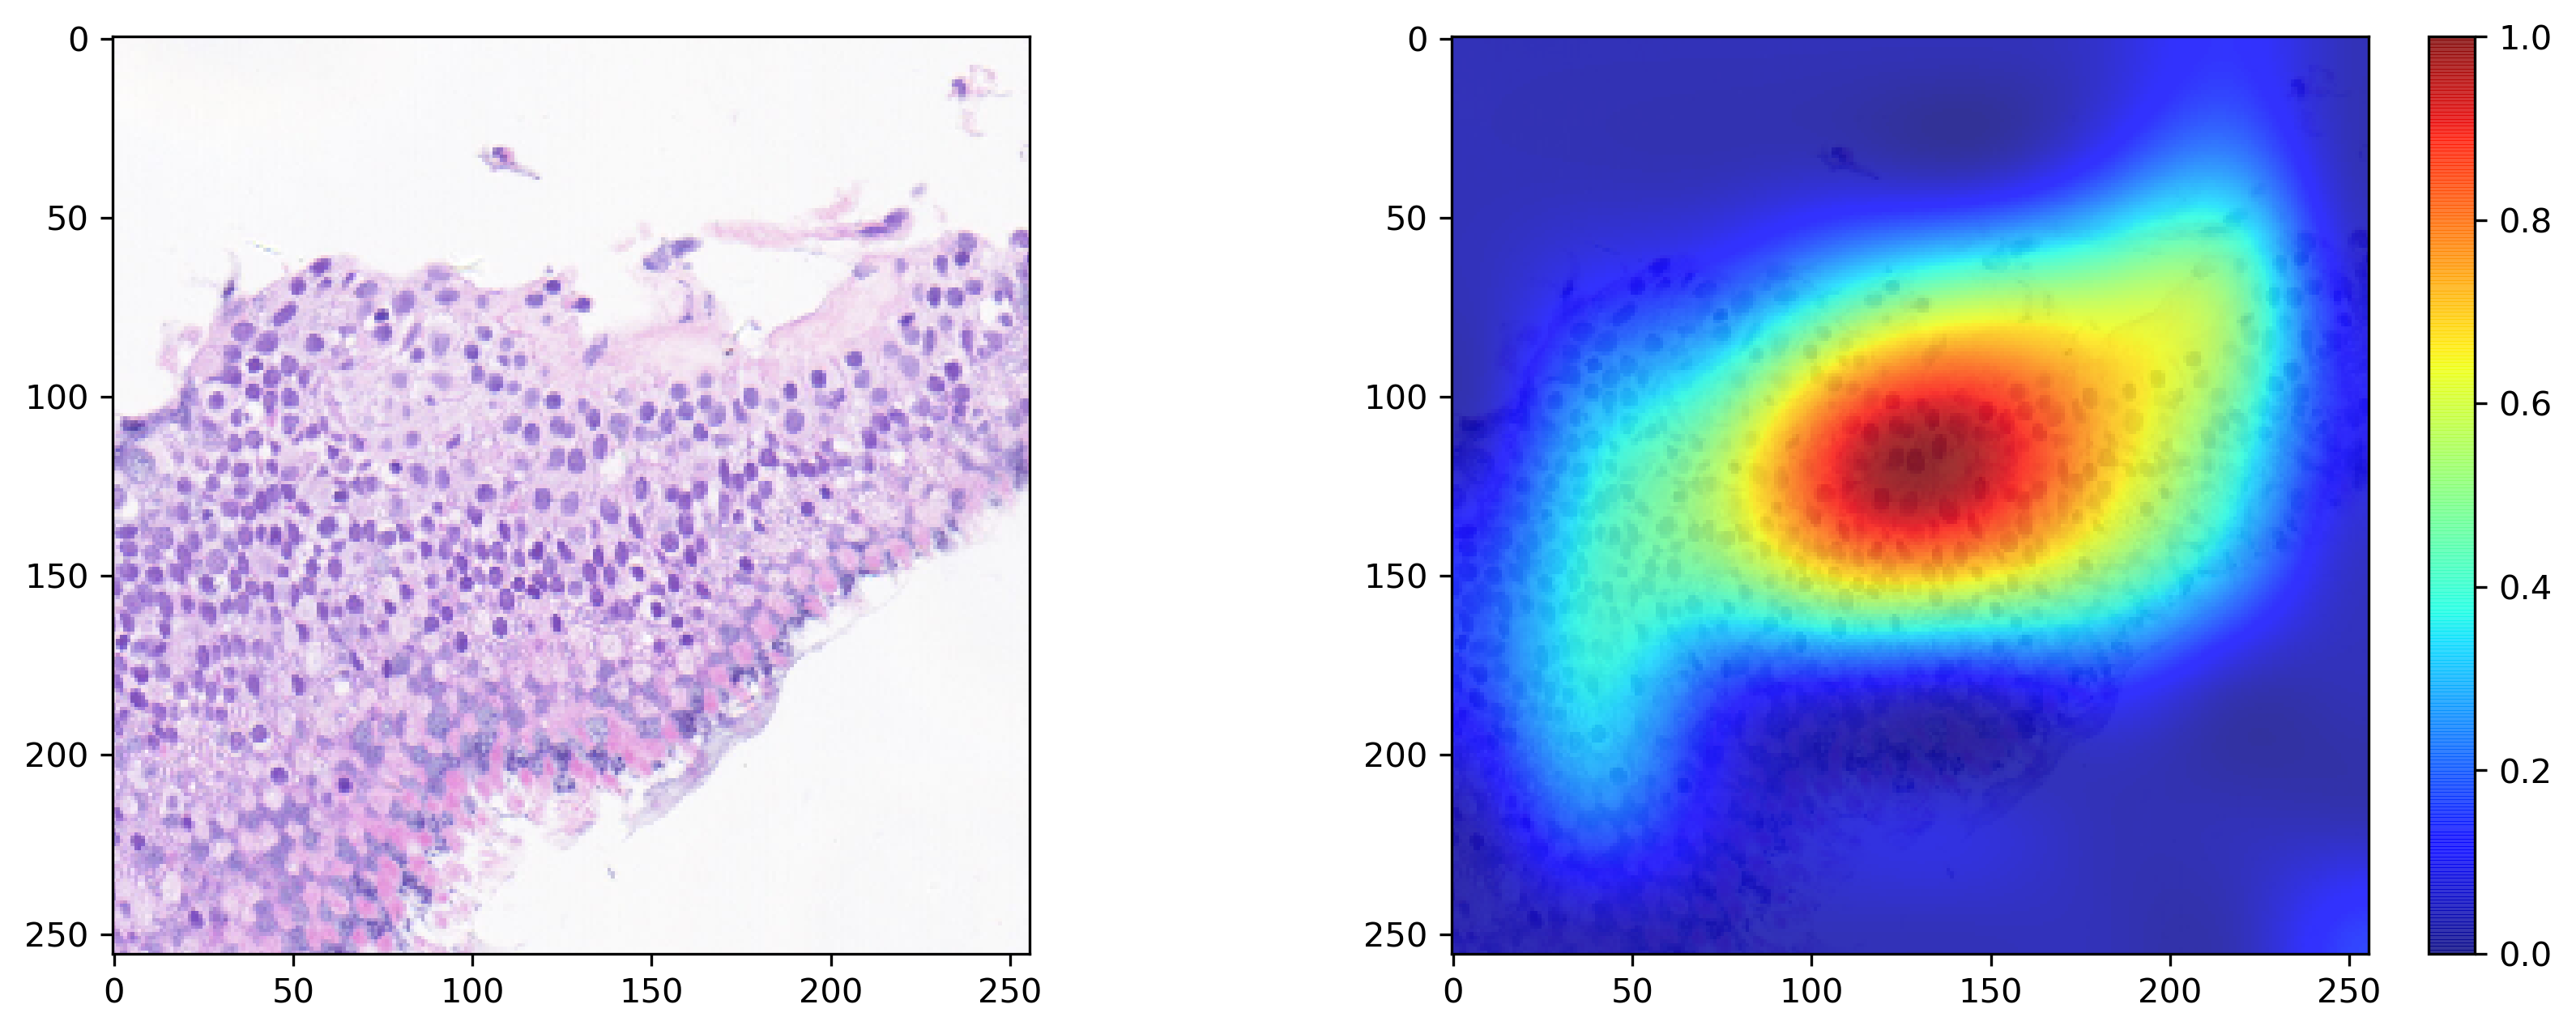

In [35]:
import numpy as np
image1 = load_img('/raid/N377962020-09-18_10_19_49_11_50.png',target_size=(256,256))
image1 = img_to_array(image1)
image1 /= 255

IMAGE1 = np.asarray(image1)

Y_pred1 = model_a.predict(IMAGE1[np.newaxis,...])
np.argmax(Y_pred1)

from vis.utils import utils
from vis.visualization import visualize_cam
penultimate_layer_idx = utils.find_layer_idx(model, "top_conv") 
class_idx  = 1
seed_input = IMAGE1
grad_top1  = visualize_cam(model, layer_idx, class_idx, seed_input, 
                           penultimate_layer_idx = penultimate_layer_idx,#None,
                           backprop_modifier     = None,
                           grad_modifier         = None)

import matplotlib.pyplot as plt
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(image1)
    axes[1].imshow(image1)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    
    plt.rcParams['savefig.dpi'] =300
    plt.rcParams['figure.dpi'] = 300
plot_map(grad_top1)